In [2]:
import numpy as np
from modeltesting import neutrinos as HNL

In [75]:
def mixing_ratios(eta, imomega = 10, reomega = 0):
    mu2 = HNL.CasasIbarra_2(hierarchy = 'i', eta = eta, imomega = imomega, reomega = reomega)
    mu2 = np.abs(mu2)
    # mu2 = np.sum(np.abs(mu2), axis = 1)
    # mu2 = np.sum(mu2, axis = 1)
    return mu2[:,0]/np.sum(mu2[:,0])

In [82]:
etas = np.linspace(0, 6.28, 1000)
vals = np.array([mixing_ratios(eta, imomega = 3, reomega = eta) for eta in etas])
vals2 = np.array([mixing_ratios(eta, imomega = 3, reomega = 0.*eta) for eta in etas])

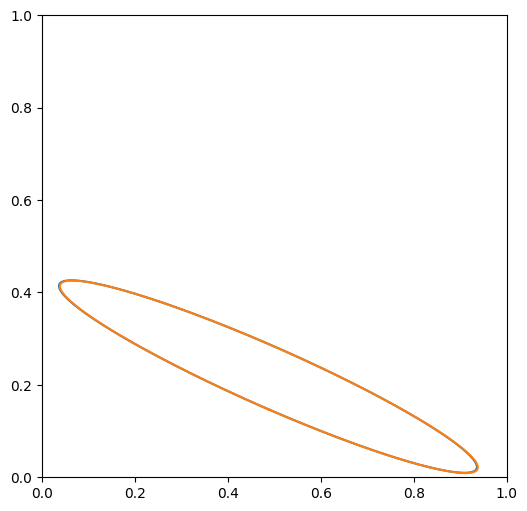

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
plt.plot(vals[:, 0], vals[:,1])
plt.plot(vals2[:, 0], vals2[:,1])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

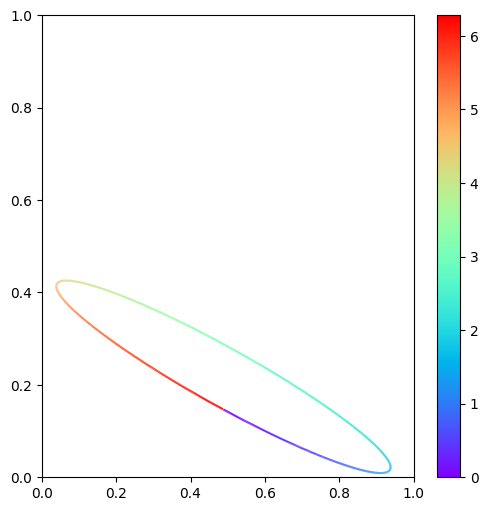

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


# Generate some example data
vals2 = np.array([mixing_ratios(eta, imomega = 3, reomega = 0.*eta) for eta in etas])
x = vals2[:, 0]
y = vals2[:, 1]
z = etas  # This could be any function z(x, y)

# Create segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection from the segments and set the colormap
lc = LineCollection(segments, cmap='rainbow')
lc.set_array(z)  # Set the values used for colormapping

# Create the plot
fig, ax = plt.subplots(figsize = (6,6))
ax.add_collection(lc)  # Add the LineCollection to the axes
ax.autoscale()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.colorbar(lc, ax=ax)  # Add colorbar, optional
plt.show()
